# Hands-on 3: Tutorial del Algoritmo K-Means

**Nombre:** Christopher Leonardo Lopez Vilchis
**Fecha:** 05/11/2025

Este notebook es un tutorial sobre la técnica de clustering K-Means, implementada en Python usando la librería `scikit-learn`.

## 1.1 Fundamentos de la técnica

**K-Means** es uno de los algoritmos de **clustering (agrupamiento)** más populares y sencillos. Pertenece a la categoría de **aprendizaje no supervisado**, lo que significa que no utiliza etiquetas de datos previamente conocidas para entrenar.

El objetivo principal de K-Means es particionar un conjunto de $n$ puntos de datos en $k$ grupos (o *clusters*) distintos y no superpuestos. El algoritmo funciona de la siguiente manera:

1.  **Inicialización:** Se eligen $k$ puntos de datos al azar (o de forma inteligente, como con 'k-means++') para que sirvan como los **centroides** iniciales de los clusters.
2.  **Paso de Asignación:** Cada punto de dato del conjunto se asigna al cluster cuyo centroide esté más cercano. La "cercanía" se mide comúnmente usando la **distancia Euclidiana**.
3.  **Paso de Actualización:** Una vez que todos los puntos han sido asignados, se recalcula la posición de los centroides. El nuevo centroide de cada cluster es la **media (promedio)** de todos los puntos de datos asignados a ese cluster.
4.  **Convergencia:** Los pasos 2 y 3 se repiten iterativamente hasta que la asignación de puntos a los clusters ya no cambia, o los centroides se estabilizan.

## 1.2 Modelo Matemático

El objetivo de K-Means es minimizar la **inercia**, también conocida como la **Suma de Cuadrados Dentro del Cluster** (WCSS, *Within-Cluster Sum of Squares*).

La fórmula matemática que K-Means intenta minimizar es:

$$
J = \sum_{j=1}^{k} \sum_{i=1}^{n} ||x_i^{(j)} - c_j||^2
$$

Donde:
* $k$ es el número de clusters.
* $n$ es el número de puntos de datos.
* $J$ es la función objetivo (la inercia total).
* $c_j$ es el centroide del cluster $j$.
* $x_i^{(j)}$ es el $i$-ésimo punto de dato que pertenece al cluster $j$.
* $||x_i^{(j)} - c_j||^2$ es la distancia Euclidiana al cuadrado entre un punto de dato y el centroide de su cluster.

En resumen, el algoritmo busca que los puntos dentro de un mismo cluster estén lo más cerca posible entre sí (alta cohesión) y lo más lejos posible de los puntos de otros clusters (alta separación).

## 1.3 Descripción de la librería (scikit-learn)

Para esta implementación, usaremos la librería `scikit-learn` (o `sklearn`), la herramienta estándar de oro para Machine Learning en Python.

* **Librería:** `sklearn`
* **Módulo:** `sklearn.cluster`
* **Clase Principal:** `KMeans`

La clase `sklearn.cluster.KMeans` es la que implementa el algoritmo. Algunos de sus parámetros e atributos más importantes son:

**Parámetros clave (al crear el modelo):**
* `n_clusters` (int, default=8): El número $k$ de clusters que queremos encontrar.
* `init` (default='k-means++'): El método de inicialización de centroides. 'k-means++' es un método inteligente que acelera la convergencia. 'random' los elige al azar.
* `n_init` (int, default=10): El número de veces que el algoritmo se ejecutará con diferentes semillas de centroides. `scikit-learn` elegirá automáticamente el mejor resultado (el de menor inercia).
* `max_iter` (int, default=300): El número máximo de iteraciones (Pasos de Asignación y Actualización) para una sola ejecución.
* `random_state` (int): Permite que los resultados sean reproducibles.

**Atributos clave (después de entrenar el modelo):**
* `.cluster_centers_`: Devuelve las coordenadas de los centroides finales.
* `.labels_`: Devuelve un array donde cada elemento es el índice del cluster (de 0 a $k-1$) al que fue asignado el punto de dato correspondiente.
* `.inertia_`: Devuelve el valor final de la inercia (WCSS).

## 1.4 Pipeline (Implementación Práctica)

Comenzamos importando las librerías necesarias y cargando un dataset. Usaremos el famoso dataset **Iris**, que es excelente para ejemplos de clustering y clasificación, ya que tiene 3 clases bien definidas.

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Configuración de Seaborn para gráficos más bonitos
sns.set(style="whitegrid")

# Cargar el dataset Iris
iris = load_iris()
X = iris.data # Las 4 características (features)
y = iris.target # Las 3 clases reales (0: Setosa, 1: Versicolor, 2: Virginica)

# Para el preprocesamiento, es más fácil trabajar con un DataFrame de Pandas
df = pd.DataFrame(X, columns=iris.feature_names)
print("Primeras 5 filas del dataset:")
print(df.head())

print(f"\nDimensiones de los datos (X): {X.shape}")

Primeras 5 filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dimensiones de los datos (X): (150, 4)


### + Preprocesamiento

En esta etapa, realizamos un análisis estadístico básico y visualizamos los datos. Un paso crucial para K-Means es el **escalado de características**, ya que el algoritmo se basa en distancias y es sensible a las diferentes escalas de las variables.

In [ ]:
# Análisis estadístico descriptivo (avg, std, max, min...)
print("Análisis estadístico del dataset:")
print(df.describe())

Análisis estadístico del dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


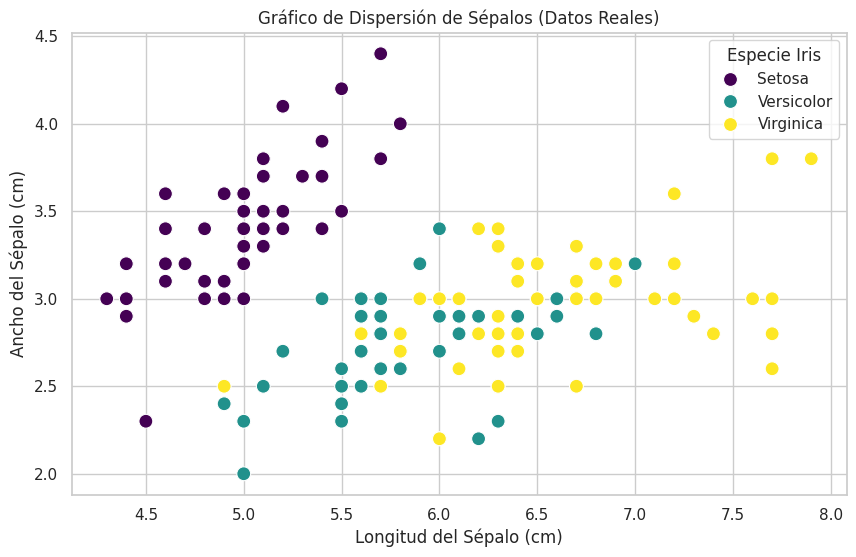

In [ ]:
# Gráfico de Dispersión (Scatter Plot)
# Visualizaremos la relación entre la longitud y el ancho del sépalo.
# Usamos 'y' (las etiquetas reales) solo para colorear y ver si los grupos son obvios.
plt.figure(figsize=(10, 6))

# 1. Capturamos el gráfico en la variable 'ax'
ax = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=y, palette='viridis', s=100)
plt.title('Gráfico de Dispersión de Sépalos (Datos Reales)')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')

# 2. Obtenemos los 'handles' (colores) y 'labels' (0, 1, 2) que generó seaborn
handles, labels = ax.get_legend_handles_labels()

# 3. Creamos la leyenda AHORA SÍ pasando los handles correctos con las etiquetas que queremos
ax.legend(handles=handles, labels=['Setosa', 'Versicolor', 'Virginica'], title='Especie Iris')

plt.show()

In [ ]:
# K-Means es sensible a la escala de los datos, por lo que escalamos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nPrimeras 5 filas de datos escalados:")
print(X_scaled[:5])


Primeras 5 filas de datos escalados:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [ ]:
# Entrenar el modelo K-Means
# Sabemos que Iris tiene 3 especies, así que usamos k=3 (n_clusters=3)

k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(X_scaled)

# Obtener los clusters (etiquetas) asignados por K-Means
clusters = kmeans.labels_

# Obtener los centroides
centroids = kmeans.cluster_centers_

print(f"\nCentroides encontrados (en el espacio escalado):")
print(centroids)

print(f"\nEtiquetas de cluster asignadas (primeros 20 puntos):")
print(clusters[:20])


Centroides encontrados (en el espacio escalado):
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]

Etiquetas de cluster asignadas (primeros 20 puntos):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


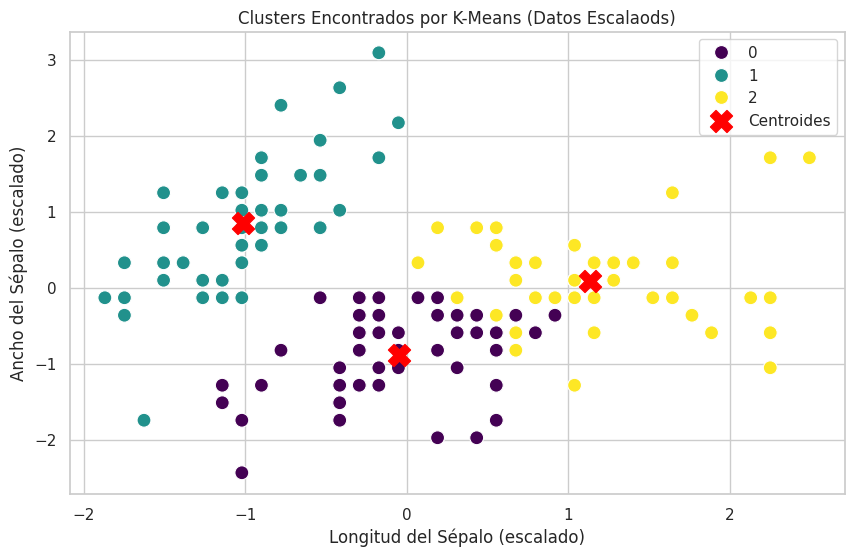

In [ ]:
# Visualizar los clusters encontrados por K-Means
# Usamos los mismos ejes que antes (longitud y ancho de sépalo, pero ahora escalados)

plt.figure(figsize=(10, 6))
# Graficar los puntos de datos, coloreados por el 'cluster' asignado
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', s=100, legend='full')

# Graficar los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=250, marker='X', label='Centroides')

plt.title('Clusters Encontrados por K-Means (Datos Escalaods)')
plt.xlabel('Longitud del Sépalo (escalado)')
plt.ylabel('Ancho del Sépalo (escalado)')
plt.legend()
plt.show()

### + Predicción

Ahora creamos una función que recibe un nuevo "patrón" (una nueva flor Iris) y predice a qué cluster pertenecería.

**Importante:** La nueva entrada debe ser escalada usando el **mismo** objeto `scaler` que usamos para entrenar.

In [ ]:
def predecir_cluster(nuevo_patron):
  """
  Predice el cluster para un nuevo patrón de datos.
  El patrón debe ser una lista o array de 4 características [sl, sw, pl, pw].
  """
  print(f"Patrón de entrada: {nuevo_patron}")

  # 1. Convertir a array de NumPy 2D
  patron_np = np.array(nuevo_patron).reshape(1, -1)

  # 2. Escalar el patrón con el *mismo* scaler
  patron_scaled = scaler.transform(patron_np)
  print(f"Patrón escalado: {patron_scaled}")

  # 3. Predecir con el modelo K-Means entrenado
  cluster_predicho = kmeans.predict(patron_scaled)

  print(f"--- RESULTADO: El patrón pertenece al Cluster {cluster_predicho[0]} ---")
  return cluster_predicho[0]

# --- Prueba de la función ---

# Ejemplo 1: Una flor parecida a Setosa (valores bajos)
ejemplo_setosa = [5.1, 3.5, 1.4, 0.2]
predecir_cluster(ejemplo_setosa)

print("\n" + "="*30 + "\n")

# Ejemplo 2: Una flor parecida a Virginica (valores altos)
ejemplo_virginica = [6.7, 3.0, 5.2, 2.3]
predecir_cluster(ejemplo_virginica)

Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Patrón escalado: [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]]
--- RESULTADO: El patrón pertenece al Cluster 1 ---


Patrón de entrada: [6.7, 3.0, 5.2, 2.3]
Patrón escalado: [[ 1.03800476 -0.13197948  0.8195957   1.44883158]]
--- RESULTADO: El patrón pertenece al Cluster 2 ---


np.int32(2)

### + Model Evaluation

**Nota Importante:** K-Means es un algoritmo **no supervisado**; no "sabe" sobre las etiquetas verdaderas. Las métricas como "Accuracy" y "Matriz de Confusión" son para **clasificación supervisada**.

Sin embargo, como *sí* tenemos las etiquetas reales del dataset Iris (`y`), podemos hacer un ejercicio académico: **comparar los clusters encontrados por K-Means con las clases reales** para ver qué tan bien la agrupación se alinea con la realidad biológica.

**El Desafío del Mapeo:**
K-Means asignará etiquetas como `0`, `1` y `2`, pero no hay garantía de que el "Cluster 0" de K-Means corresponda a la "Clase 0" (Setosa) real. El "Cluster 0" podría corresponder a la Clase 1, el "Cluster 1" a la Clase 2, etc.

Primero, usaremos una tabla de cruce (crosstab) para ver la correspondencia, y luego "mapearemos" las etiquetas para poder calcular la Matriz de Confusión.

In [ ]:
# 1. Ver la correspondencia entre etiquetas reales (y) y clusters
# (Usamos las etiquetas de cluster originales, 'clusters')
ct = pd.crosstab(y, clusters, rownames=['Clase Real'], colnames=['Cluster K-Means'])
print("Tabla de Cruce (Crosstab):")
print(ct)

# --- Análisis de la Tabla (basado en el random_state=42) ---
# Fila 0 (Real: Setosa): 50 puntos están en el Cluster 1 de K-Means.
# Fila 1 (Real: Versicolor): 48 puntos están en el Cluster 0 de K-Means.
# Fila 2 (Real: Virginica): 36 puntos están en el Cluster 2 de K-Means.

# 2. Mapeo
# Clase Real 0 -> Cluster 1
# Clase Real 1 -> Cluster 0
# Clase Real 2 -> Cluster 2

# Creamos un nuevo array 'y_pred' con las etiquetas mapeadas
y_pred = np.zeros_like(clusters)
y_pred[clusters == 1] = 0
y_pred[clusters == 0] = 1
y_pred[clusters == 2] = 2

print("\nEtiquetas reales (y):     ", y[:10])
print("Clusters K-Means (raw):  ", clusters[:10])
print("Clusters Mapeados (y_pred):", y_pred[:10])

Tabla de Cruce (Crosstab):
Cluster K-Means   0   1   2
Clase Real                 
0                 0  50   0
1                39   0  11
2                14   0  36

Etiquetas reales (y):      [0 0 0 0 0 0 0 0 0 0]
Clusters K-Means (raw):   [1 1 1 1 1 1 1 1 1 1]
Clusters Mapeados (y_pred): [0 0 0 0 0 0 0 0 0 0]



Matriz de Confusión:
[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


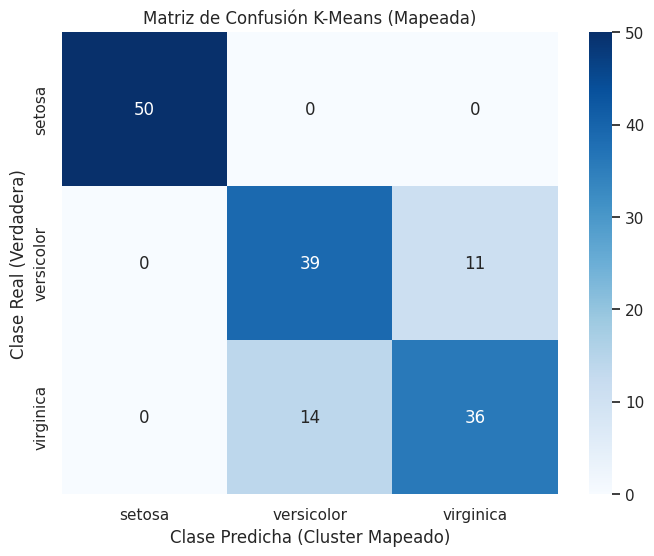


Accuracy (Precisión Global): 83.33%


In [ ]:
# Ahora que 'y_pred' está alineado con 'y', podemos calcular las métricas

# 1. Matriz de Confusión
cm = confusion_matrix(y, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('Clase Real (Verdadera)')
plt.xlabel('Clase Predicha (Cluster Mapeado)')
plt.title('Matriz de Confusión K-Means (Mapeada)')
plt.show()

# 2. Accuracy
acc = accuracy_score(y, y_pred)
print(f"\nAccuracy (Precisión Global): {acc * 100:.2f}%")

#### Breve Explicación de los Resultados:

* **Matriz de Confusión:**
    * La diagonal principal **(50, 39, 36)** muestra los aciertos. Vemos que K-Means fue perfecto para la clase 'setosa' (50/50).
    * Los números fuera de la diagonal son errores.
        * Confundió **11** puntos de 'versicolor' (real) como 'virginica' (predicho).
        * Confundió **14** puntos de 'virginica' (real) como 'versicolor' (predicho).
    * Esto es normal; 'versicolor' y 'virginica' son especies más similares entre sí que 'setosa'.

* **Accuracy:**
    * Un accuracy de **83.33%** significa que, después de mapear los clusters, más del 83% de las flores fueron agrupadas por K-Means junto con otras flores de su misma especie real. Esto indica que K-Means hizo un buen trabajo separando los grupos naturales en los datos.


## 3. Referencias bibliográficas

* Documentación de `scikit-learn` sobre K-Means: [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* Libro: "Introduction to Data Mining" por Tan, Steinbach, y Kumar.
* Artículo de K-Means++: Arthur, D. y Vassilvitskii, S. (2007). "k-means++: The advantages of careful seeding".